In [167]:
import pandas as pd
import numpy as np
import os
import pydicom
import matplotlib.pyplot as plt
from skimage.io import imread
import seaborn as sns
from glob import glob
import ipywidgets as widgets
import scipy.ndimage as ndimage
import imageio
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go


<class 'numpy.ndarray'>


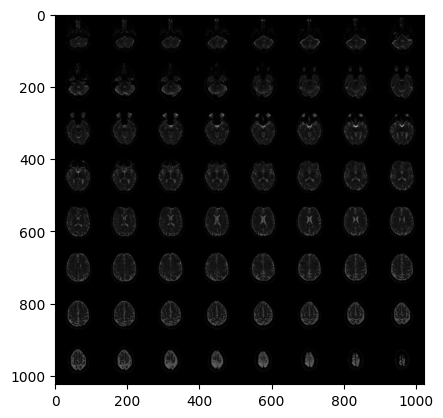

71

In [168]:
import pydicom
import matplotlib.pyplot as plt
import os
import numpy as np

filePath = '/Applications/tez/tez_data/TOMRUK_ZAHIDE_DTI/DTI/DIFFUSION_HIGHRES_0009/TOMRUK_ZAHIDE.MR.HD_MYELIN.0009.0002.2023.05.25.08.42.54.640625.31370386.IMA'
img = pydicom.read_file(filePath)

plt.imshow(img.pixel_array,cmap="gray")
print(type(img.pixel_array))
plt.show()


#### Get Mosaic Picturess  ####

mosaic_pictures_files = "/Applications/tez/tez_data/TOMRUK_ZAHIDE_DTI/DTI/DIFFUSION_HIGHRES_0009/"

mosaic_paths = os.listdir(mosaic_pictures_files)

mosaic_paths.sort()

len(mosaic_paths)


(1024, 1024)

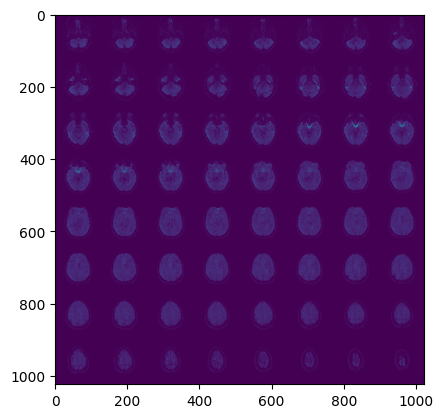

In [169]:
mosaic_picture = pydicom.read_file(mosaic_pictures_files + mosaic_paths[45])
plt.imshow(mosaic_picture.pixel_array)
mosaic_picture.pixel_array.shape

In [172]:
mosaic_ndarray = mosaic_picture.pixel_array


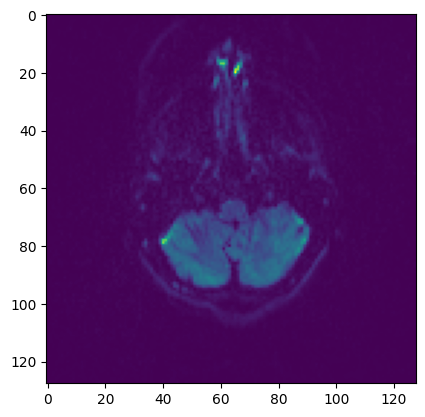

In [173]:
plt.imshow(mosaic_ndarray[0:128,128+128:256+128])


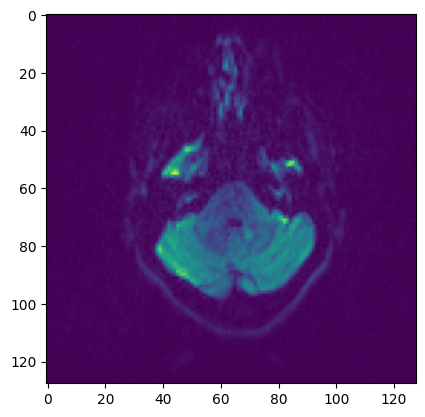

In [174]:
plt.imshow(mosaic_ndarray[128:256,0:128])


In [182]:
def split_slice(path):
    liste = []
    b_values = []
    mosaic_picture = pydicom.read_file(path)
    b_val = mosaic_picture[0x019, 0x100c]
    b_values.append(b_val)
    mosaic_ndarray = mosaic_picture.pixel_array
    for i in range(8):
        for j in range(8):
            slice = mosaic_ndarray[i*128:(i*128)+128,j*128:(j*128)+128]
            liste.append(slice)
            
    return  liste, b_values
             
    

In [231]:
slice_liste, b_list = split_slice(mosaic_pictures_files + mosaic_paths[45])

In [232]:
len(b_list)
print(b_list)

[(0019, 100c) [B_value]                           IS: '700']


In [233]:
type(b_list)

b_list = str(b_list)

print()


19.0

In [237]:
len(slice_liste)

64

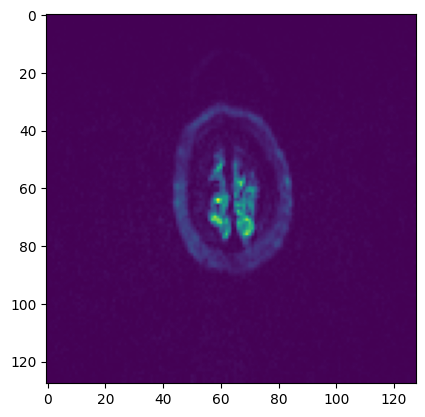

In [10]:
plt.imshow(slice_liste[63])

In [11]:

def all_mosaic_split(mosaic_pictures_files):
    mosaic_paths = os.listdir(mosaic_pictures_files)
    mosaic_paths.sort()

    all_mosaic_slices = []

    for k in mosaic_paths:
        slices_list = split_slice(mosaic_pictures_files + k)
        all_mosaic_slices.append(slices_list)

    return all_mosaic_slices


In [12]:
all_mosaic_slices = all_mosaic_split(mosaic_pictures_files)

In [13]:
len(all_mosaic_slices)

71

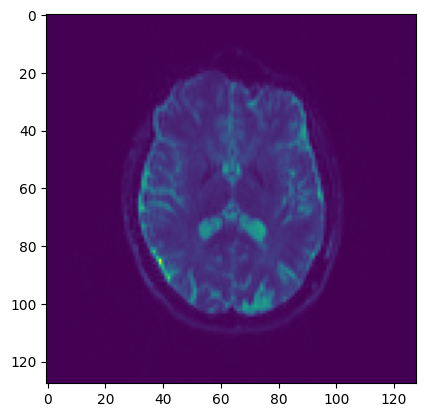

In [14]:
plt.imshow(all_mosaic_slices[0][30]) # First Patient first slices of the mosaic pictures

In [15]:
type(all_mosaic_slices[0])

list

In [16]:
all_mosaic_slices_ndarray = np.array(all_mosaic_slices)

In [17]:
all_mosaic_slices_ndarray.shape

(71, 64, 128, 128)

In [18]:
all_mosaic_slices_ndarray[0].shape

(64, 128, 128)

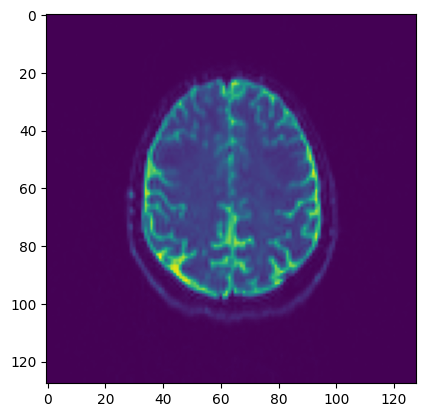

In [19]:
plt.imshow(all_mosaic_slices_ndarray[0,45,:,:])

In [20]:
first_mosaic_slices = all_mosaic_slices_ndarray[0]

In [21]:
m0, m1, m2 = first_mosaic_slices.shape

In [32]:
# Add a slider that starts with 0 and ends at the number of
# slices along the axial plane, n0=99.
@widgets.interact(axial_slice=(0,m0-1))
# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice
# using the slider.

def axial_slicer(axial_slice=50):
  
  # Show the image of the specified slice number in 'gray' color-map
  # and axial aspect ratio
  
  plt.imshow(first_mosaic_slices[axial_slice,:,:],cmap='hot' )
  #plt.imshow(first_mosaic_slices[axial_slice,:,:], cmap='gray')
  #plt.imshow(first_mosaic_slices[axial_slice,:,:], cmap='hot')
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='RdBu')


  # Don't show the axis
  plt.axis('off')
  plt.title("Splited Slices from Mosic Pictures")

interactive(children=(IntSlider(value=50, description='axial_slice', max=63), Output()), _dom_classes=('widget…

In [33]:
np.min(first_mosaic_slices)

0

In [72]:
np.max(first_mosaic_slices)

4095

In [98]:
mask = first_mosaic_slices < 500
mask

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [99]:
type(mask)

numpy.ndarray

In [100]:
mask.shape

(64, 128, 128)

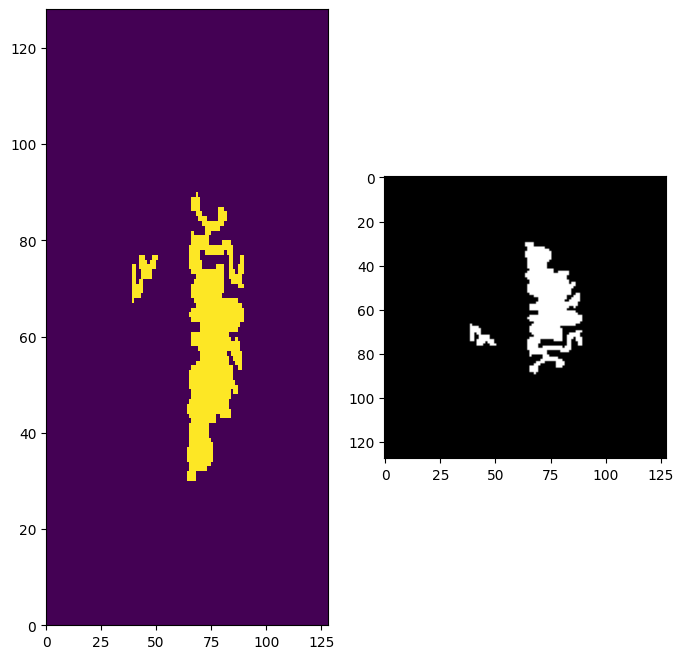

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))

ax[0].pcolormesh(mask[50,:,:])

ax[1].imshow(mask[50,:,:], cmap='gray')


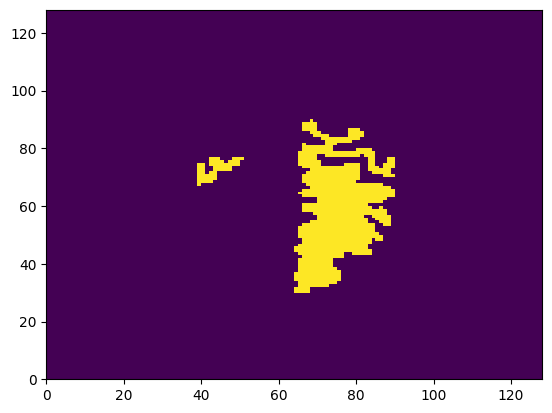

In [132]:
mask_task = np.vectorize(ndi.binary_fill_holes, signature='(n,m)->(n,m)')(mask)
plt.pcolormesh(mask_task[50])

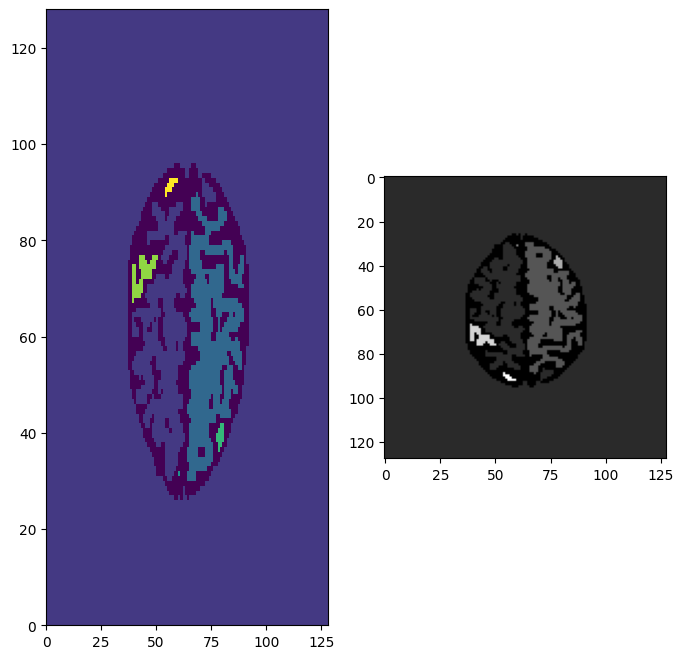

In [109]:
mask_labeled = np.vectorize(label, signature='(n,m)->(n,m)')(mask)
#plt.pcolormesh(mask_labeled[50])
#plt.colorbar()

fig, ax = plt.subplots(1, 2, figsize=(8, 8))

ax[0].pcolormesh(mask_labeled[50,:,:])

ax[1].imshow(mask_labeled[50,:,:], cmap='gray')


In [110]:
slc = mask_labeled[50]
rps = regionprops(slc)
areas = [r.area for r in rps]
idxs = np.argsort(areas)[::-1] # we want largest to smallest

In [111]:
new_slc = np.zeros_like(slc)
for i in idxs[:3]:
    new_slc[tuple(rps[i].coords.T)] = i+1

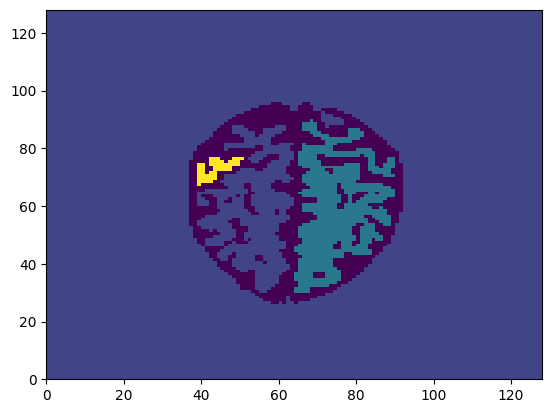

In [112]:
plt.pcolormesh(new_slc)

In [113]:
def keep_top_3(slc):
    new_slc = np.zeros_like(slc)
    rps = regionprops(slc)
    areas = [r.area for r in rps]
    idxs = np.argsort(areas)[::-1]
    for i in idxs[:3]:
        new_slc[tuple(rps[i].coords.T)] = i+1
    return new_slc

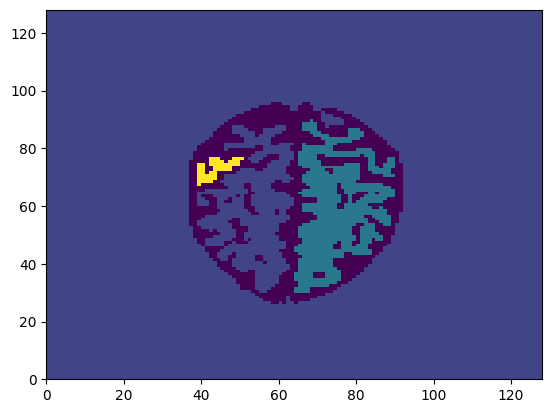

In [114]:
mask_labeled = np.vectorize(keep_top_3, signature='(n,m)->(n,m)')(mask_labeled)
plt.pcolormesh(mask_labeled[50])

In [118]:
np.max(mask_labeled)

7

In [119]:
np.min(mask_labeled)

0

In [139]:
mask_labeled.shape

(64, 128, 128)

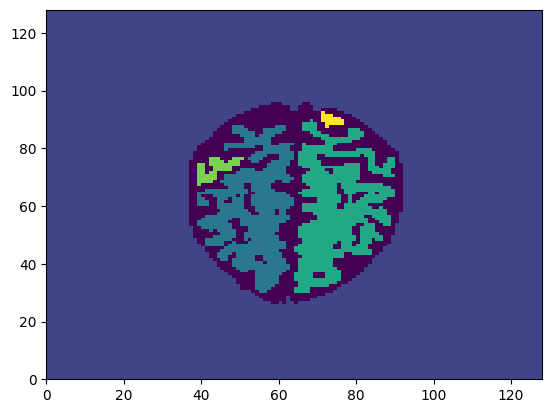

In [140]:
labels = label(mask_labeled[50],connectivity=1,background=0)
plt.pcolormesh(labels)

In [141]:
rps = regionprops(labels)
areas = np.array([r.area for r in rps])
np.where(areas/512**2 < 0.0069)

(array([1, 2, 3, 4]),)

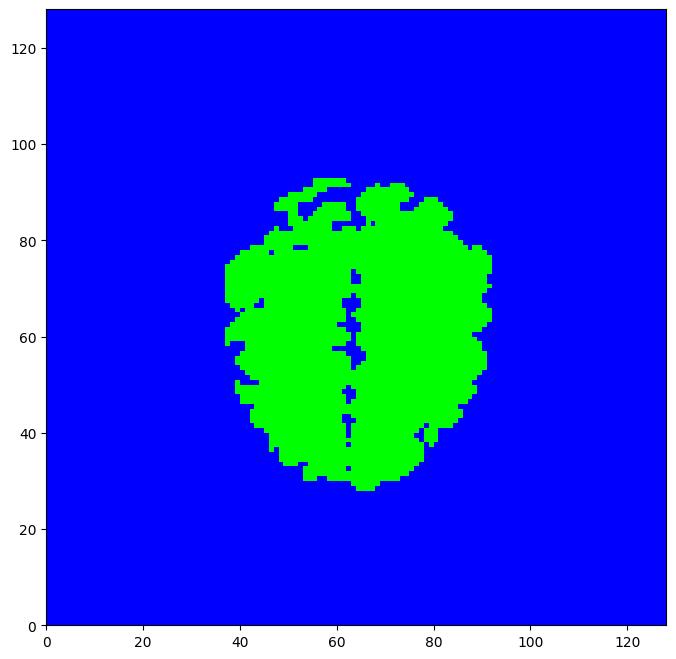

In [148]:
mask_new = binary_dilation(mask, iterations=2)
plt.figure(figsize=(8,8))
plt.pcolormesh(mask_new[50], cmap='brg')


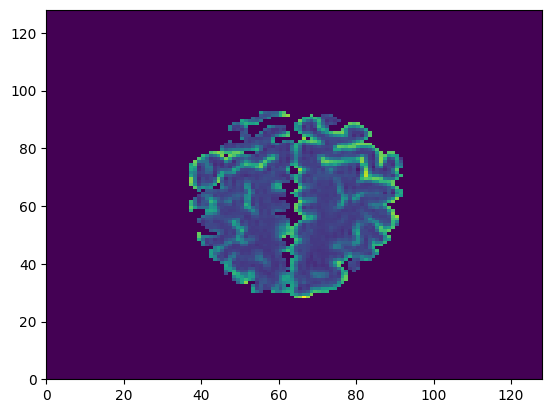

In [158]:
img_new = mask_new * first_mosaic_slices
plt.pcolormesh(img_new[50])